In [ ]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import os



In [ ]:

train_dir = '/content/drive/My Drive/Cotton_Disease/train'
val_dir = '/content/drive/My Drive/Cotton_Disease/val'
test_dir = '/content/drive/My Drive/Cotton_Disease/test'
num_classes = 4  # Number of plant disease categories
batch_size = 32
img_size = (224, 224)




In [ ]:
# Cell 3: Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=30, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical")
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical")
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical", shuffle=False)


Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [ ]:
# Cell 4: Load Pre-trained VGG19 Model
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Custom Classification Head
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Cell 5: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
# Cell 6: Train the Model
epochs = 50
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 683s 11s/step - accuracy: 0.5312 - loss: 1.1198 - val_accuracy: 0.7826 - val_loss: 0.5008
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 38s 621ms/step - accuracy: 0.7977 - loss: 0.5165 - val_accuracy: 0.8577 - val_loss: 0.3687
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 615ms/step - accuracy: 0.8183 - loss: 0.4541 - val_accuracy: 0.9051 - val_loss: 0.2946
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 37s 598ms/step - accuracy: 0.8515 - loss: 0.3901 - val_accuracy: 0.8933 - val_loss: 0.2633
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 592ms/step - accuracy: 0.8693 - loss: 0.3244 - val_accuracy: 0.9091 - val_loss: 0.2383
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 604ms/step - accuracy: 0.8977 - loss: 0.2905 - val_accuracy: 0.9091 - val_loss: 0.2257
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 588ms/step - accuracy: 0.8841 - loss: 0.2890 - val_accuracy: 0.9091 - val_loss: 0.2386
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 37s 604ms/step - accuracy: 0.9045 - loss: 0.2679 - val_accur

In [ ]:
model.save("vgg_model (1).h5")


NameError: name 'model' is not defined

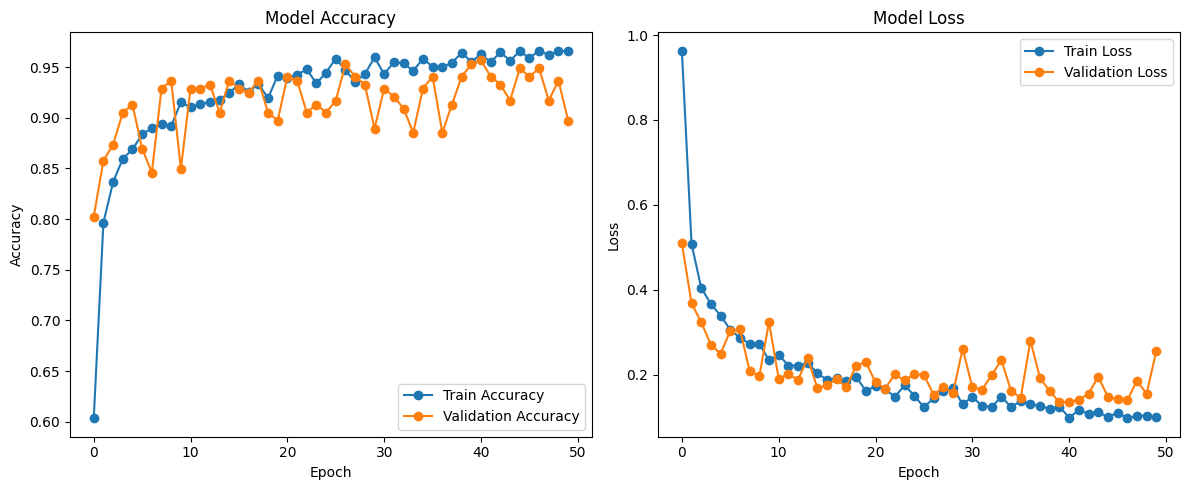

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - accuracy: 0.9309 - loss: 0.1491
Test Accuracy: 93.40%


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Print report
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 538ms/step
                       precision    recall  f1-score   support

 diseased cotton leaf       0.96      1.00      0.98        25
diseased cotton plant       1.00      0.75      0.86        28
    fresh cotton leaf       1.00      1.00      1.00        26
   fresh cotton plant       0.82      1.00      0.90        27

             accuracy                           0.93       106
            macro avg       0.94      0.94      0.93       106
         weighted avg       0.94      0.93      0.93       106

